In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_csv('data/solarpower.csv')

df.head(5)

,date,cum_power
0,2017-01-01,20111.0
1,2017-01-02,20112.0
2,2017-01-03,20115.0
3,2017-01-04,20117.0
4,2017-01-05,20119.0


In [3]:
df[df['cum_power'] == -1].head(10)

,date,cum_power
45,2017-02-15,-1.0
647,2018-10-10,-1.0


In [4]:
for i in df.index:
    if df['cum_power'].iloc[i] == -1:
        df['cum_power'].iloc[i] = (df['cum_power'].iloc[i-1] + df['cum_power'].iloc[i+1]) / 2

C:\Users\ak88r\AppData\Local\Temp\ipykernel_996\1401405658.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cum_power'].iloc[i] = (df['cum_power'].iloc[i-1] + df['cum_power'].iloc[i+1]) / 2


In [7]:
df['cum_power'].mean()

23848.246987951807

In [16]:
df['day_power'] = df['cum_power']

In [19]:
for i in range(1, len(df.index)):
    df['day_power'].iloc[i] = df['cum_power'].iloc[i] - df['cum_power'][i-1]

C:\Users\ak88r\AppData\Local\Temp\ipykernel_996\2751239793.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['day_power'].iloc[i] = df['cum_power'].iloc[i] - df['cum_power'][i-1]


In [24]:
df['day_power'][0] =  0

C:\Users\ak88r\AppData\Local\Temp\ipykernel_996\1611151537.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['day_power'][0] =  0


In [25]:
df['day_power'].head()

0    0.0
1    1.0
2    3.0
3    2.0
4    2.0
Name: day_power, dtype: float64

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 664 entries, 0 to 663
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       664 non-null    object 
 1   cum_power  664 non-null    float64
 2   day_power  664 non-null    float64
dtypes: float64(2), object(1)
memory usage: 15.7+ KB


In [27]:
df['date'] = pd.to_datetime(df['date'])

In [48]:
df['Month'] = df['date'].dt.month

In [49]:
df['Month']

0       1
1       1
2       1
3       1
4       1
       ..
659    10
660    10
661    10
662    10
663    10
Name: Month, Length: 664, dtype: int64

In [32]:
df['Year'] = df['date'].dt.year

In [33]:
df['Year'].head()

0    2017
1    2017
2    2017
3    2017
4    2017
Name: Year, dtype: int64

In [50]:
grouped = df.groupby(['Year', 'Month'])['day_power'].mean()
display(grouped)

Year  Month
2017  1         3.129032
      2         3.714286
      3        10.774194
      4        16.300000
      5        19.000000
      6        21.500000
      7        18.129032
      8        15.064516
      9        11.533333
      10        6.419355
      11        3.233333
      12        1.161290
2018  1         2.064516
      2         6.928571
      3         8.709677
      4        14.633333
      5        21.032258
      6        18.766667
      7        22.000000
      8        17.096774
      9        13.866667
      10        9.000000
Name: day_power, dtype: float64

C:\Users\ak88r\AppData\Local\Temp\ipykernel_996\2626711265.py:3: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



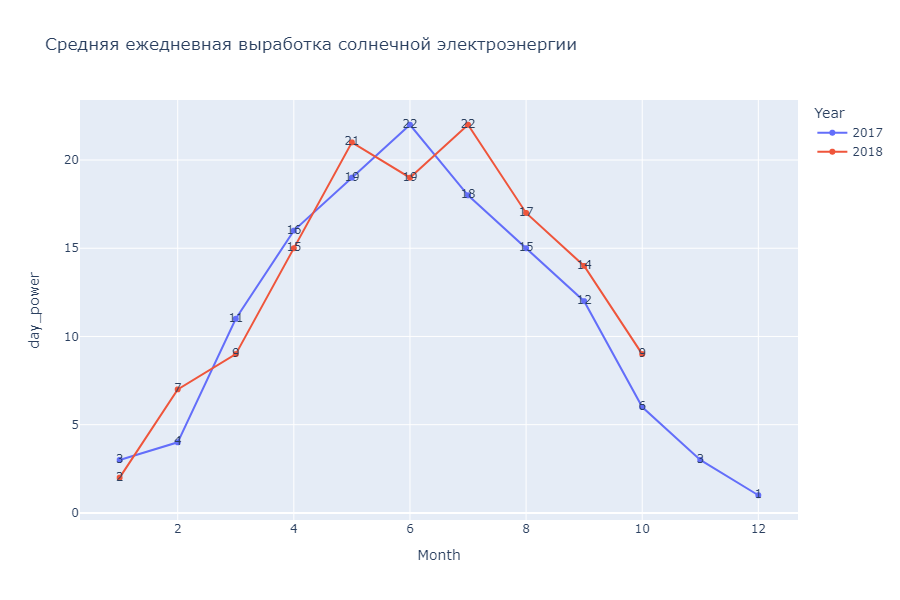

In [51]:
mean_day_power = px.line(
    data_frame = round(df.groupby(['Year',\
        'Month'], as_index=False).mean()),
    x = 'Month',
    y = 'day_power',
    color = 'Year',
    text = 'day_power',
    #barmode='group',
    orientation = 'v',
    height = 600,
    width = 900,
    title = 'Средняя ежедневная выработка солнечной электроэнергии'
    )

mean_day_power.show("png")

In [ ]:
def apply_discounts(products, stocks):
    for key in stocks.keys():
        if key in products.keys():
            products[key] = round(float(products[key]) * (1 - (float(stocks[key].strip('%')) /100)), 2)
    return products


In [ ]:
mport pandas as pd

bronze_top = pd.read_csv('bronze_top.csv')
silver_top = pd.read_csv('silver_top.csv')

merged = bronze_top.merge(silver_top, on='Country', suffixes=['_bronze','_silver'], how='inner')
